In [5]:
import numpy as np
from scipy import integrate
import time
import matplotlib.pyplot as plt
import os


Question 1

In [6]:
#Defining the function we want to integrate
def f(x,y): 
    return y/(1+x**2)


In [7]:
#Typical rk4 implementation 
def rk4_step(fun,x,y,h):

    k1=fun(x,y)*h #call 1
    k2=h*fun(x+h/2,y+k1/2) #call 2
    k3=h*fun(x+h/2,y+k2/2) #call 3
    k4=h*fun(x+h,y+k3) #call 4
    
    return y + (k1+2*k2+2*k3+k4)/6

In [8]:
#This is a special implementation of rk4, it's accurate to fith order
#See my pdf to see how I got there 
def rk4_stepd(fun,x,y,h):

    eval = fun(x,y)                #call 1

    k1=eval*h
    k2=h*fun(x+h/2,y+k1/2)         #call 2
    k3=h*fun(x+h/2,y+k2/2)         #call 3
    k4=h*fun(x+h,y+k3)             #call 4
    y1= y + (k1+2*k2+2*k3+k4)/6  

    k5=eval*h/2
    k6=h/2*fun(x+h/4,y+k5/2)       #call 5
    k7=h/2*fun(x+h/4,y+k6/2)       #call 6
    k8=h/2*fun(x+h/2,y+k7)         #call 7
    y2_1= y + (k5+2*k6+2*k7+k8)/6

    k9=fun(x+h/2,y2_1)*h/2         #call 8
    k10=h/2*fun(x+3*h/4,y2_1+k9/2) #call 9
    k11=h/2*fun(x+3*h/4,y2_1+k10/2)#call 10
    k12=h/2*fun(x+h,y2_1+k11)      #call 11
    y2_2 = y2_1 + (k9+2*k10+2*k11+k12)/6

    return y2_2+(y2_2-y1)/15

In [9]:
#This is just to plot, nothing very interesting 
def rk_plotter(npt,tool, tool_name, calls):

    #x-values
    x=np.linspace(-20,20,npt)

    #Initial y values as specified in the PSET 
    y=np.zeros([2,npt])
    y[0,0]=1 
    y[1,0]=0 

    #calling the rk4 tool
    for i in range(npt-1):
        h=x[i+1]-x[i]
        y[:,i+1]= tool(f,x[i],y[:,i],h)
    
    #Analytic soln as provided in the PSET
    c = 1/(np.exp(np.arctan(-20)))
    truth=c*np.exp(np.arctan(x))

    #To give us an idea of how well the fit is doing 
    #I am computing the average magnitude of the residuals as well as the max value
    res_mag = np.abs(truth-y[0,:])
    print("Average of magnitude residuals:", np.mean(res_mag), ", Max of resiudals:", np.max(res_mag))

    plt.ion()
    plt.plot(x,y[0,:], label="rk4-step", linestyle="--")
    plt.plot(x,truth, label="Analytic answer")
    plt.title( repr(tool_name) + " with " + repr(npt)+ ' points x ' + repr(calls)+' function calls/per point = '  + repr(npt*calls)+  " function calls" )
    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend()

Average of magnitude residuals: 0.00011382485925091178 , Max of resiudals: 0.0002577256152314078


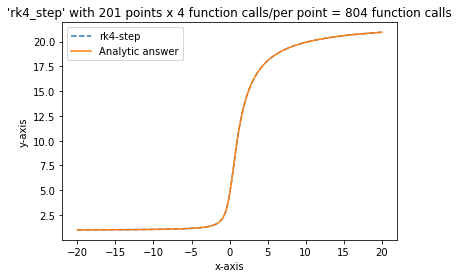

In [10]:
rk_plotter(201,rk4_step, 'rk4_step',4)

Average of magnitude residuals: 3.1121940462782243e-06 , Max of resiudals: 7.046661842480262e-06


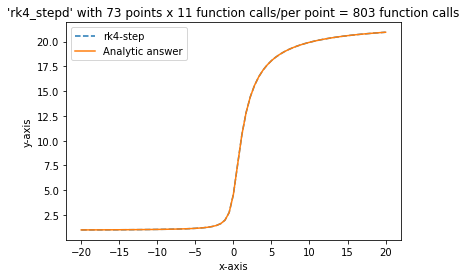

In [11]:
rk_plotter(73,rk4_stepd, 'rk4_stepd',11)

Question 2

In [12]:
#This function sets up the bateman eqns
def fun(t,y):

    #for the intermediary eqns
    def mid_bateman(r1,r2):
        return y[r1]/lifetime[r1]-y[r2]/lifetime[r2]

    #I am using year as the unit
    hour = 0.000114155
    Gyear = 1e9
    day = 0.00273973
    min = 1.9026e-6
    microsec = 3.171e-14


    lifetime = [
        4.468*Gyear,    # U238
        24.1*day,       # Th234
        6.70*hour,      # Pr234
        245500,         # U234
        75380 ,         # Th230
        1600 ,          # Ra226
        3.8235*day,     # Rn222
        3.1*min,        # Po218
        26.8*min,       # Pb214
        19.9*min,       # Bi214
        164.3*microsec, # Po214
        22.3,           # Pb210
        5.015,          # Bi210
        138376*day      # Po210
        ]
    
    #Determining the number of eqns based on the lenght of the lifetime list
    lifetime_lenght = len(lifetime)
    dydt=np.zeros(lifetime_lenght+1)

    #First eqn
    dydt[0]=-y[0]/lifetime[0]

    #All the intermediary eqns
    for i in range(1,len(lifetime)):
        dydt[i] = mid_bateman(i-1,i)

    #Last eqn
    dydt[lifetime_lenght]=y[lifetime_lenght-1]/lifetime[lifetime_lenght-1]
    
    return dydt

#Initial conditions
#Starts with [U238]=1 rest 0
y0=np.zeros(15)
y0[0] = 1


Let's look at ratio of Pb206 to U238

Text(0, 0.5, '[Pb208]/[U238]')

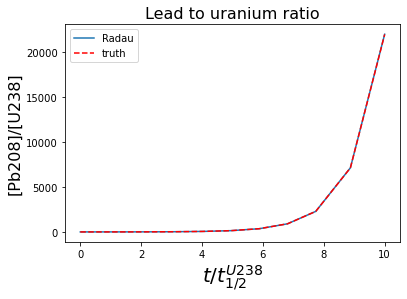

In [13]:

#Gonna plot unitl 7 half-life of U238
t0=0
t1=10*4.468e9
ans=integrate.solve_ivp(fun,[t0,t1],y0, method="Radau")

truth = np.exp(ans.t/4.468e9)-1

t_rescale = ans.t/4.468e9

#plt.figure(figsize=(10, 8), dpi=100)
plt.plot(t_rescale, truth)
plt.plot(t_rescale, ans.y[14]/ans.y[0], color="red", linestyle="--")
plt.legend(["Radau","truth"])
plt.title("Lead to uranium ratio", fontsize='16')
plt.xlabel('$t/t_{1/2}^{U238}$', fontsize = "20")
plt.ylabel("[Pb208]/[U238]",fontsize="16")

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_17220\3026788610.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(t_rescale, ans.y[4]/ans.y[3], color="red", linestyle="--")


Text(0, 0.5, '[Th230]/[U234]')

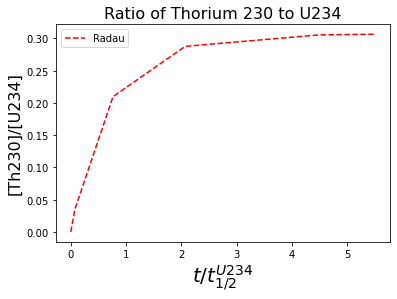

In [14]:
t0=0
t1=5.5*245500
ans=integrate.solve_ivp(fun,[t0,t1],y0, method="Radau")

t_rescale = ans.t/245500

#plt.figure(figsize=(10, 8), dpi=100)
plt.plot(t_rescale, ans.y[4]/ans.y[3], color="red", linestyle="--")
plt.legend(["Radau","truth"])

plt.title("Ratio of Thorium 230 to U234", fontsize='16')
plt.xlabel('$t/t_{1/2}^{U234}$', fontsize = "20")
plt.ylabel("[Th230]/[U234]",fontsize="16")

Question 3

In [15]:
#Loading the data
xdata,ydata,zdata = np.transpose(np.loadtxt("dish_zenith.txt"))

In [16]:
#Defining the function with new parameters
def func(x,y,a,b,c,d):
    return a+b*x+c*y+d*(x**2+y**2)



In [17]:
#Setting up the A matrix
#The coloumn are (cst,x,y,x^2+y^2)
A = np.zeros((475,4))
A[:,0] = np.ones(475)
A[:,1] = xdata
A[:,2] = ydata
A[:,3] = xdata**2+ydata**2
#A[:,4] = ydata**2
A = np.matrix(A)

In [18]:
#computing the best fit estimator
x = np.matrix(zdata).transpose()
lhs = A.transpose()*A
rhs = A.transpose()*x
fitp = np.linalg.inv(lhs)*rhs

In [19]:
A = float(fitp[0])
B = float(fitp[1])
C = float(fitp[2])
D = float(fitp[3])

In [24]:
D

0.0001667044547740124

In [22]:
print ("x0=", -B/(2*D))
print ("y0=", -C/(2*D))
print ("z0=", A-(1/(4*D)*(B**2+C**2)))

x0= -1.3604886221971237
y0= 58.221476081579574
z0= -1512.8772100367826


In [20]:
#computing the error on the parameters
#Thats where the function we define above comes at play 
N=np.mean((zdata - func(xdata, ydata, A,B,C,D))**2)
par_errs=np.sqrt(N*np.diag(np.linalg.inv(lhs)))
par_errs

array([3.12018436e-01, 1.25061100e-04, 1.19249564e-04, 6.45189976e-08])

In [ ]:
a = 1.66704455e-04
sig_a = par_errs[3]
sig_a

6.451899757263445e-08

In [ ]:
f = 1/(4*a)
sig_f = f*sig_a/a

print(f)
print(sig_f)

1499.6599820922602
0.5804077566156679


In [ ]:
2**5/2

16.0